In [ ]:
import mudata as md
import muon as mu
import mudatasets as mds

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.22.4 scipy==1.10.1 pandas==1.4.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.7.1 pynndescent==0.5.6


In [ ]:
#Open the file
mdata = mu.read('/mnt/sda/david/hydractinia/hydractinia_atlas_colored_20230825.h5mu')
adata= (mdata.mod['no']) #to slice the no multimapper modality

/mnt/sda/david/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [ ]:
adata

AnnData object with n_obs × n_vars = 199113 × 18061
    obs: 'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_1.5', 'leiden_2', 'Colony_part', 'Unique', 'leiden_1.5_names', 'broad_names'
    var: 'ratio_with_no', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Colony_part_colors', 'Library_colors', 'broad_names_colors', 'dendrogram_leiden_1.5', 'hvg', 'leiden', 'leiden_1.5_colors', 'leiden_1.5_colors_sorted', 'leiden_1.5_sorted', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_1.5', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_wilcox_leiden_1', 'rank_genes_groups_wilcox_leiden_1.5', 'rank_genes_groups_wilcox_leiden_2', 'umap'
    obsm: '

In [ ]:
adata = adata[~adata.obs['leiden_1.5_names'].isna()].copy()

In [ ]:
adata

AnnData object with n_obs × n_vars = 195300 × 18061
    obs: 'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_1.5', 'leiden_2', 'Colony_part', 'Unique', 'leiden_1.5_names', 'broad_names'
    var: 'ratio_with_no', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Colony_part_colors', 'Library_colors', 'broad_names_colors', 'dendrogram_leiden_1.5', 'hvg', 'leiden', 'leiden_1.5_colors', 'leiden_1.5_colors_sorted', 'leiden_1.5_sorted', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_1.5', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_wilcox_leiden_1', 'rank_genes_groups_wilcox_leiden_1.5', 'rank_genes_groups_wilcox_leiden_2', 'umap'
    obsm: '

In [ ]:
clusteringlayer = 'leiden_1.5'

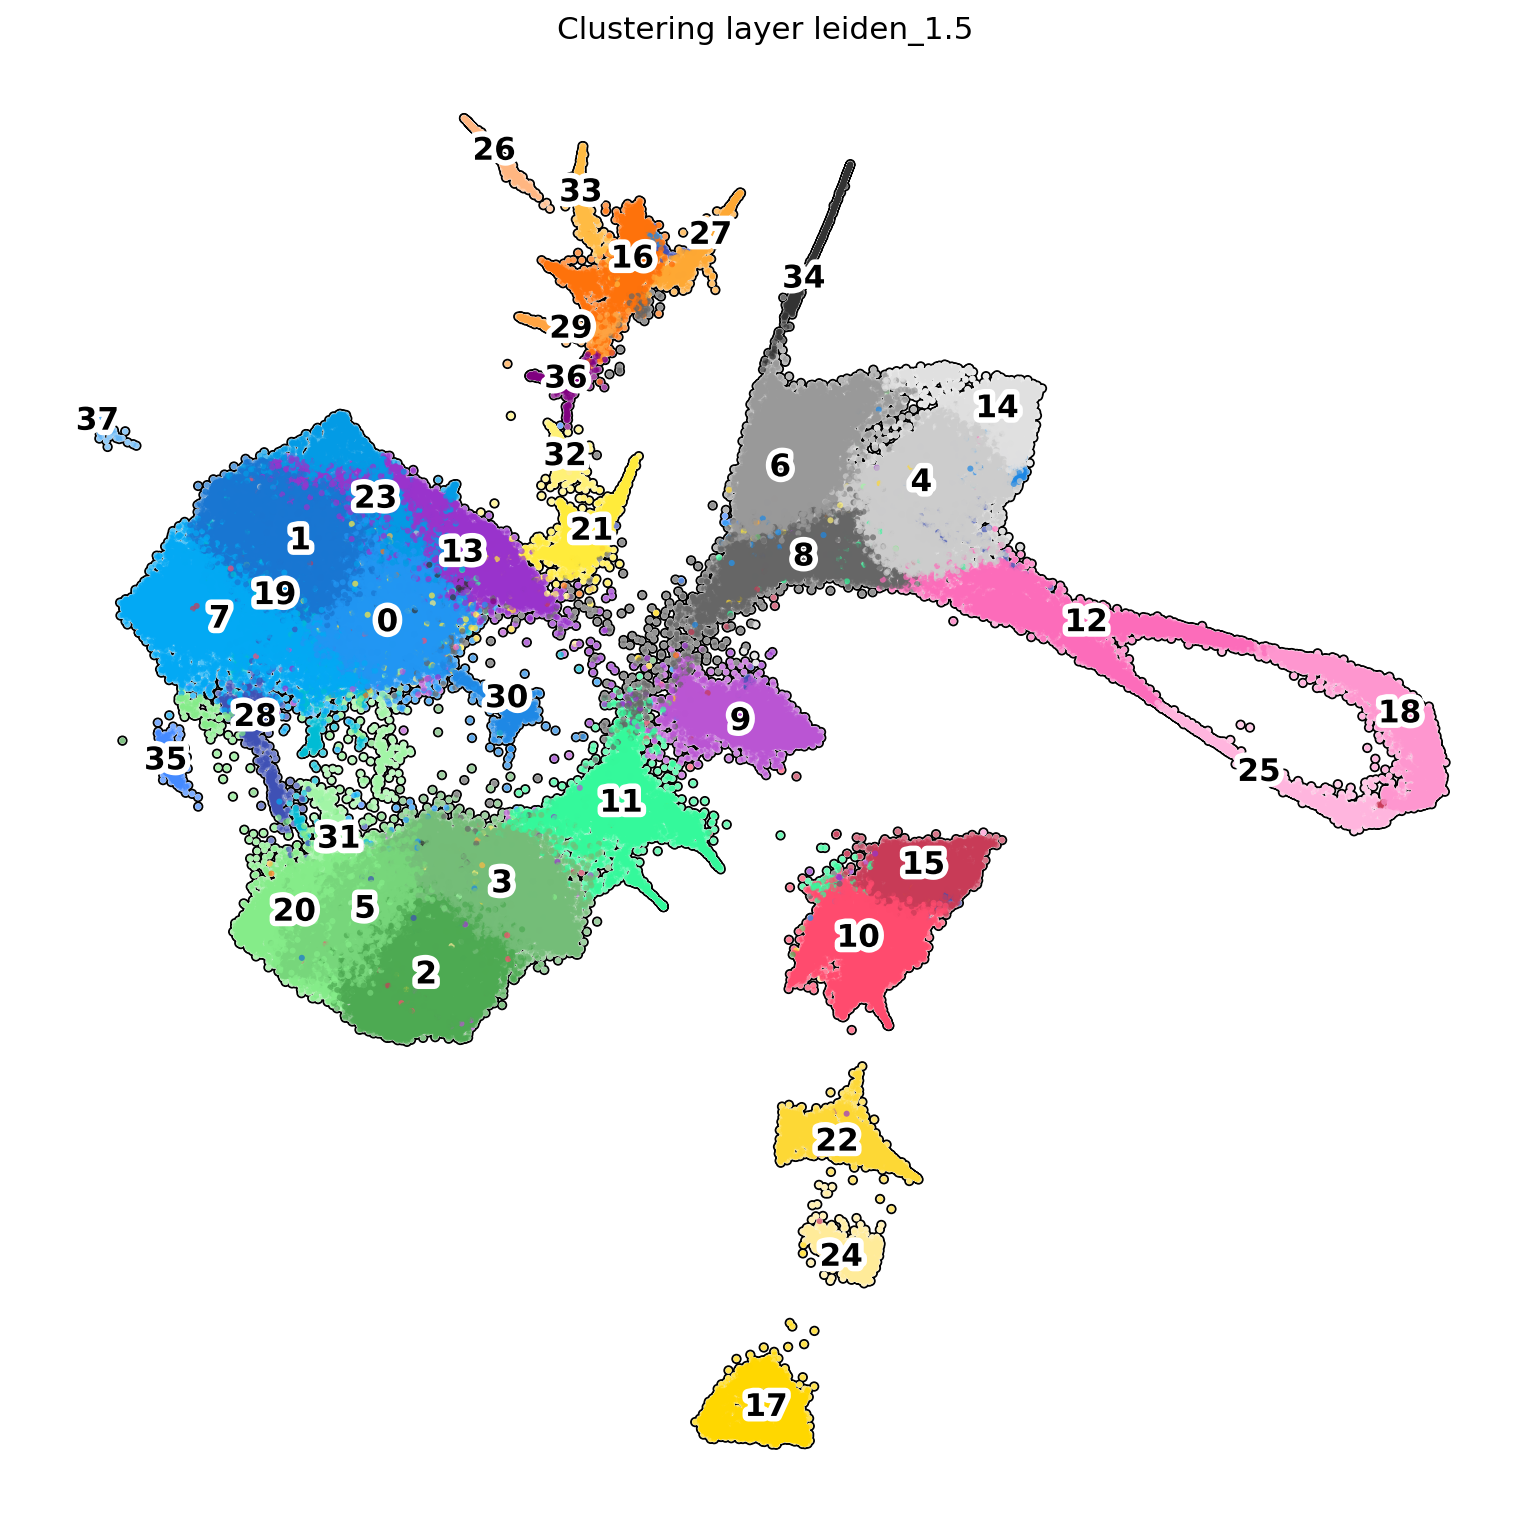

In [ ]:
with plt.rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5, title= 'Clustering layer '+str(clusteringlayer), size = 30,
        frameon=False, add_outline = True)

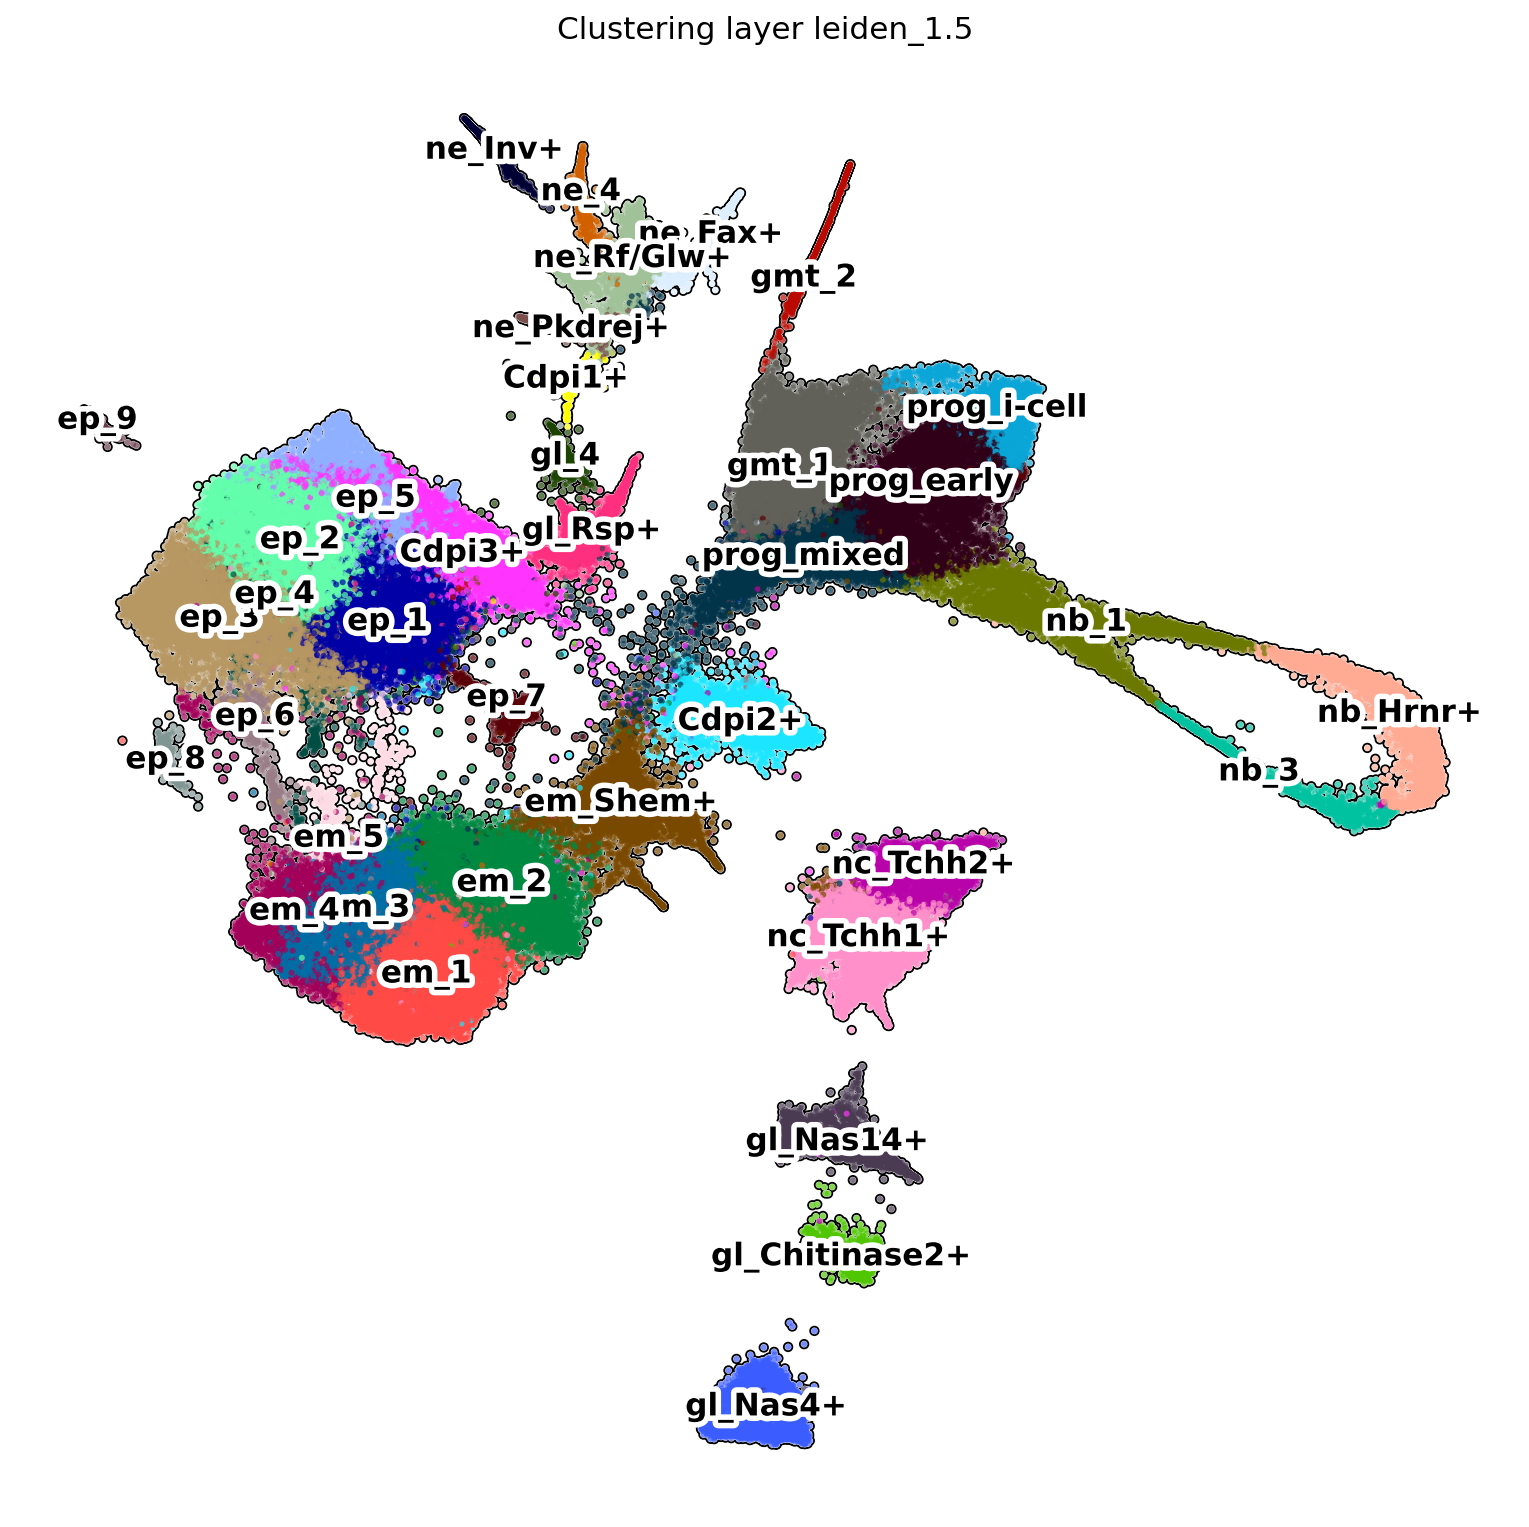

In [ ]:
with plt.rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color= 'leiden_1.5_names', legend_loc='on data', legend_fontoutline = 5, title= 'Clustering layer '+str(clusteringlayer), size = 30,
        frameon=False, add_outline = True)

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs[clusteringlayer] == '14')[0]

In [ ]:
sc.tl.dpt(adata, n_branchings=1)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:01)
    eigenvalues of transition matrix
    [1.         0.99761623 0.99626863 0.99435854 0.9925562  0.9923014
     0.9905448  0.9903924  0.9897964  0.98772216 0.98692864 0.98667425
     0.98658985 0.98638797 0.9861035 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:01:34)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:24:10)


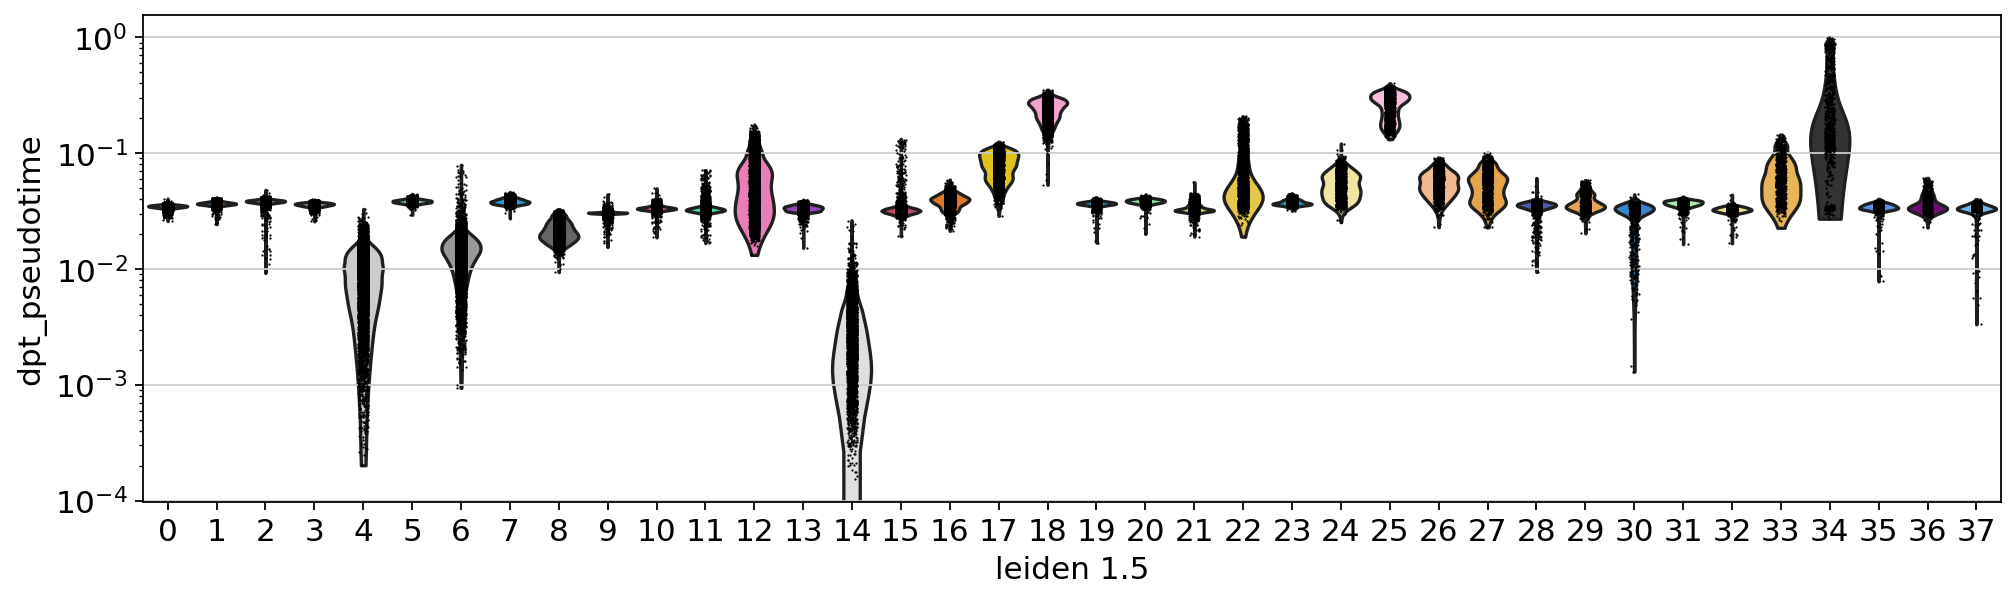

In [ ]:
with plt.rc_context({'figure.figsize': (12, 4)}):
    sc.pl.violin(adata, "dpt_pseudotime", groupby=clusteringlayer, log = True)

In [ ]:
sc.tl.paga(adata, groups = clusteringlayer)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:15)


--> added 'pos', the PAGA positions (adata.uns['paga'])


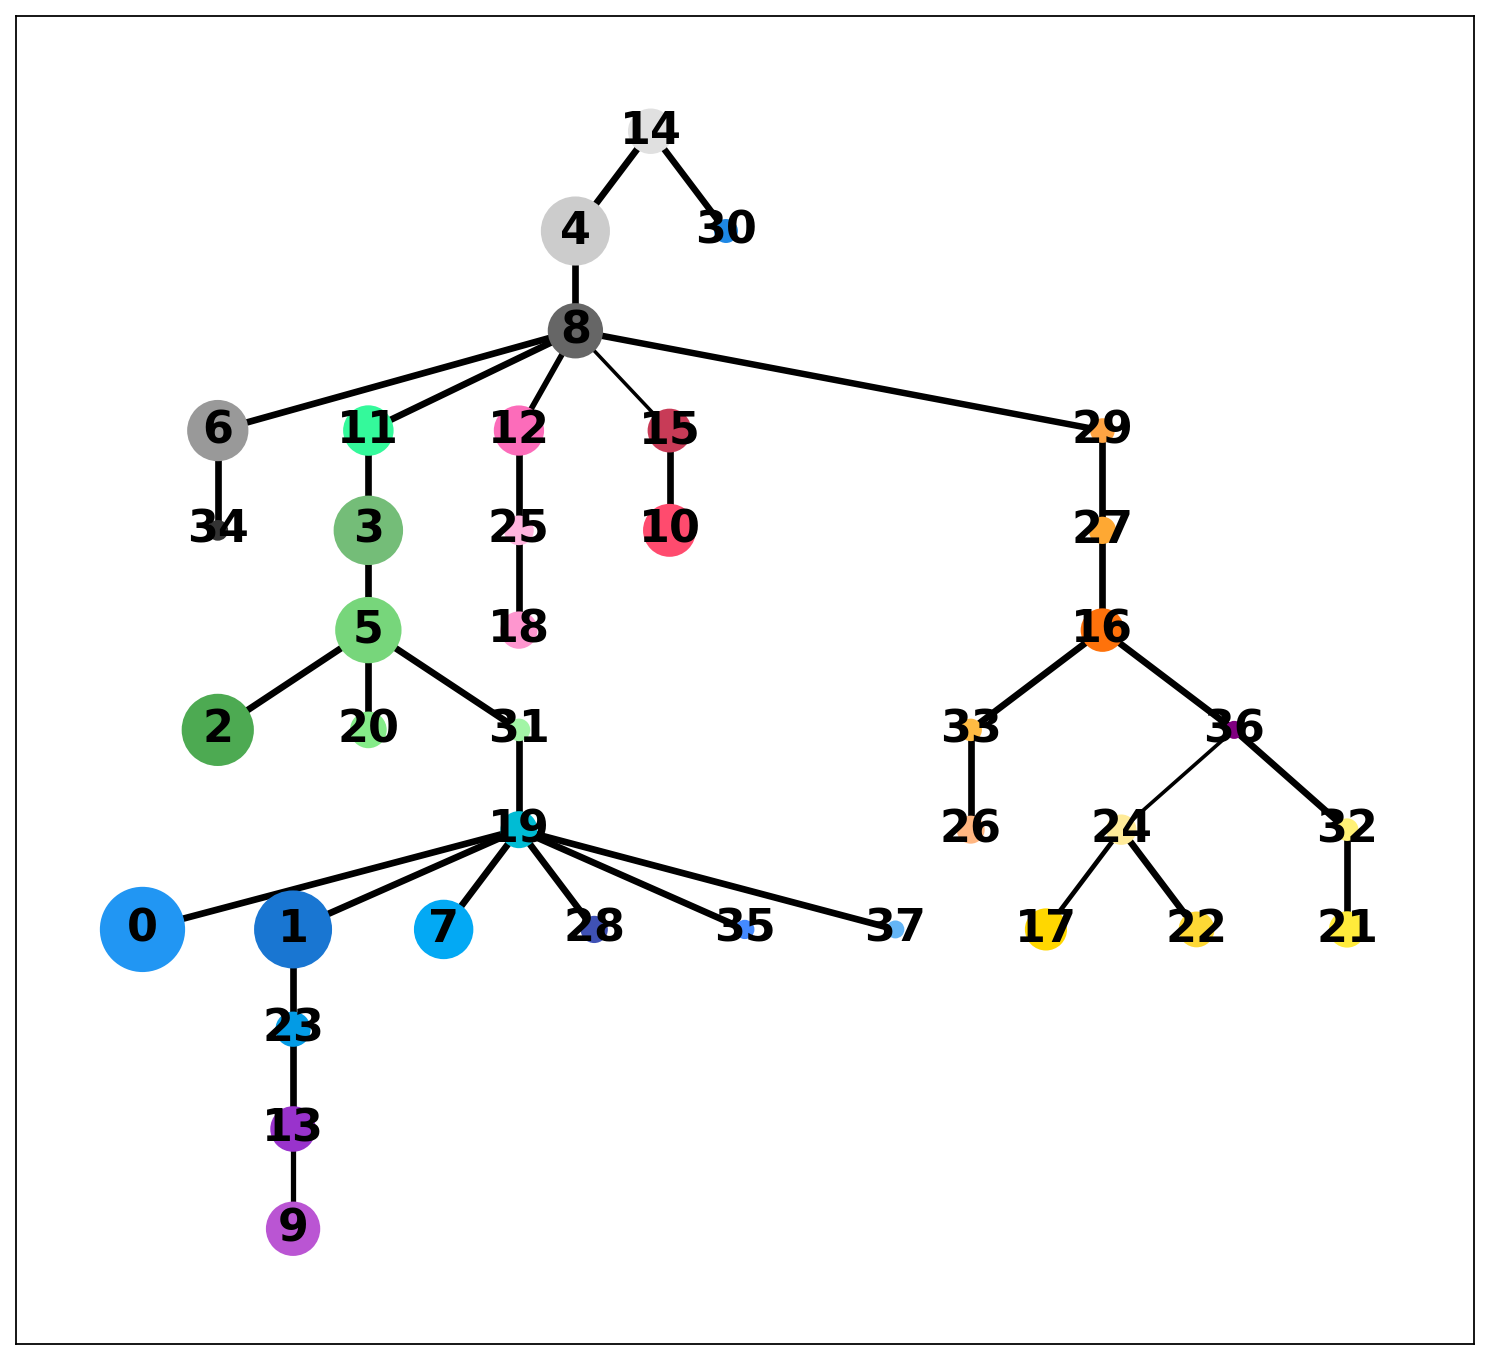

In [ ]:
with plt.rc_context({'figure.figsize': (10, 10)}):
    sc.pl.paga(adata,
    threshold=0,
    solid_edges='connectivities_tree',
    #dashed_edges='connectivities',
    root=14,
    layout='rt',
    node_size_scale=2,
    node_size_power=0.9,
    max_edge_width=3,
    fontsize=20)

--> added 'pos', the PAGA positions (adata.uns['paga'])


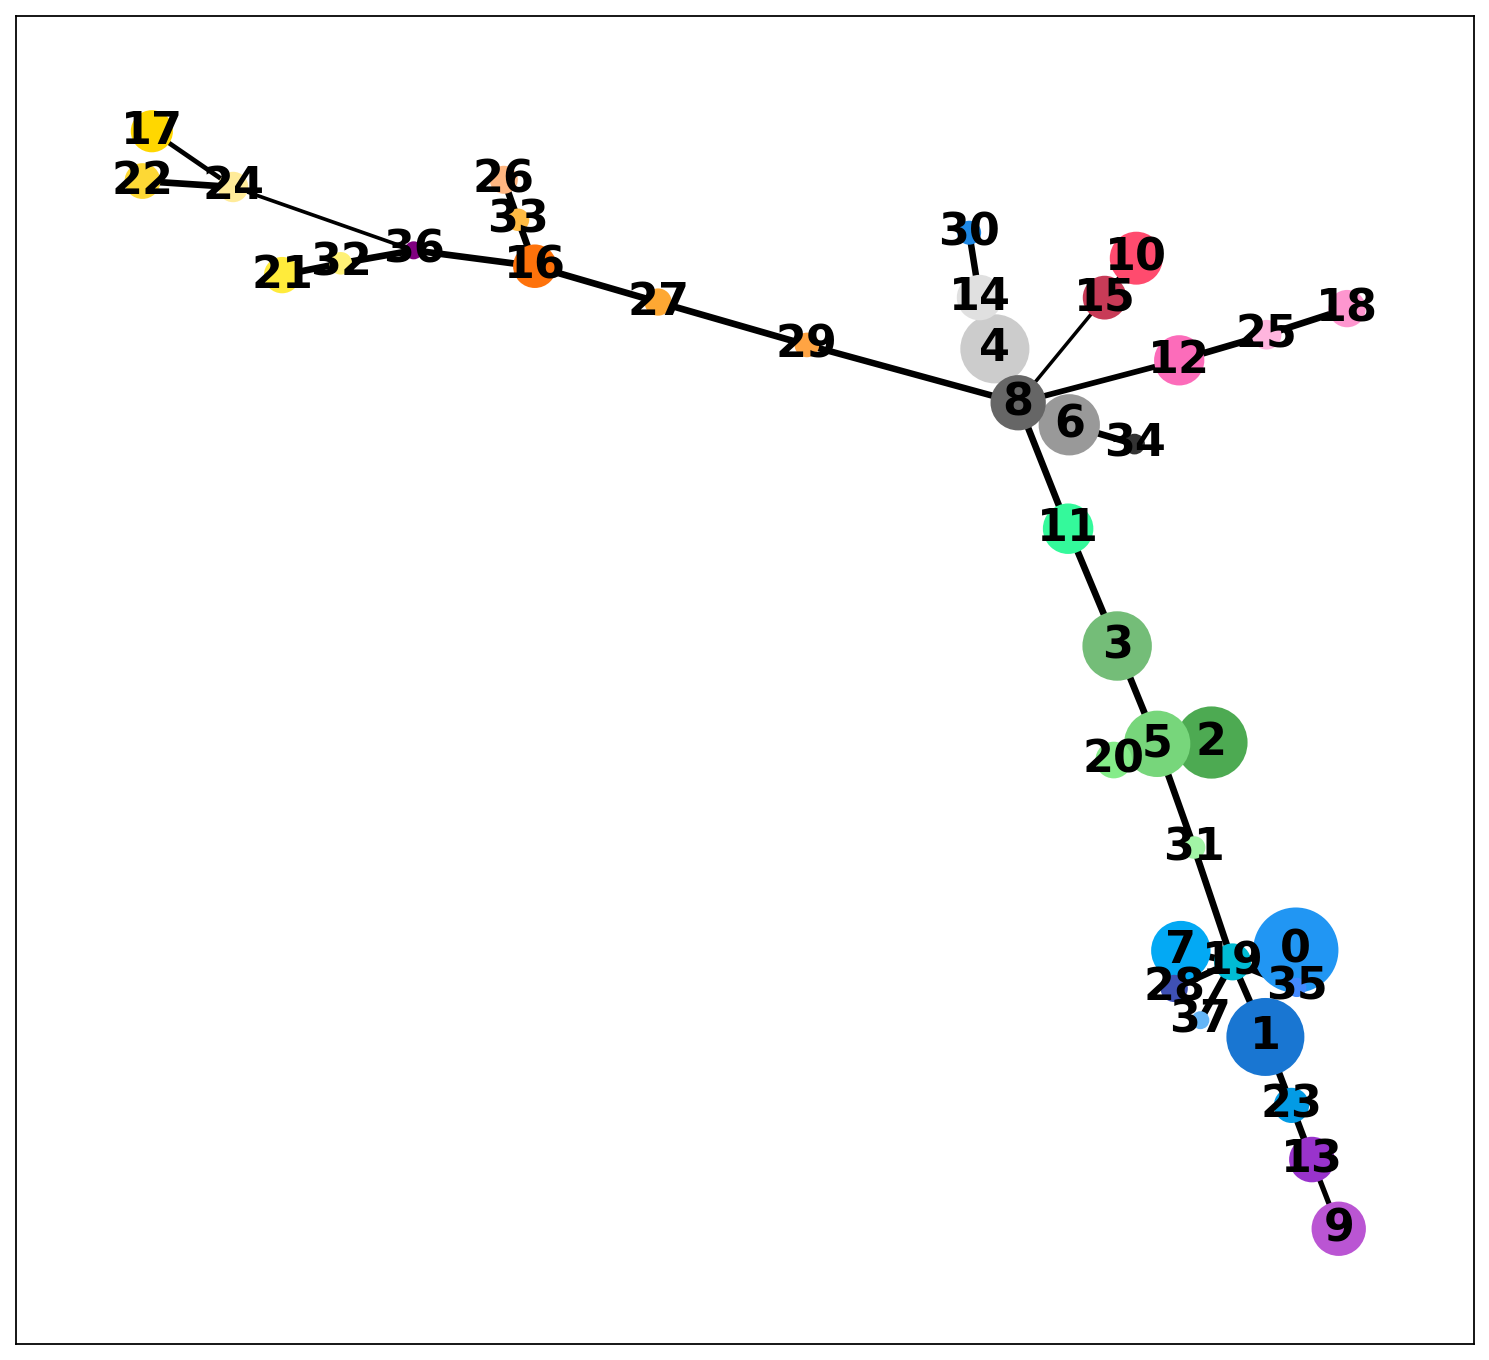

In [ ]:
with plt.rc_context({'figure.figsize': (10, 10)}):
    sc.pl.paga(adata,
    threshold=0,
    solid_edges='connectivities_tree',
    #dashed_edges='connectivities',
    root=14,
    layout='fr',
    node_size_scale=2,
    node_size_power=0.9,
    max_edge_width=3,
    fontsize=20)

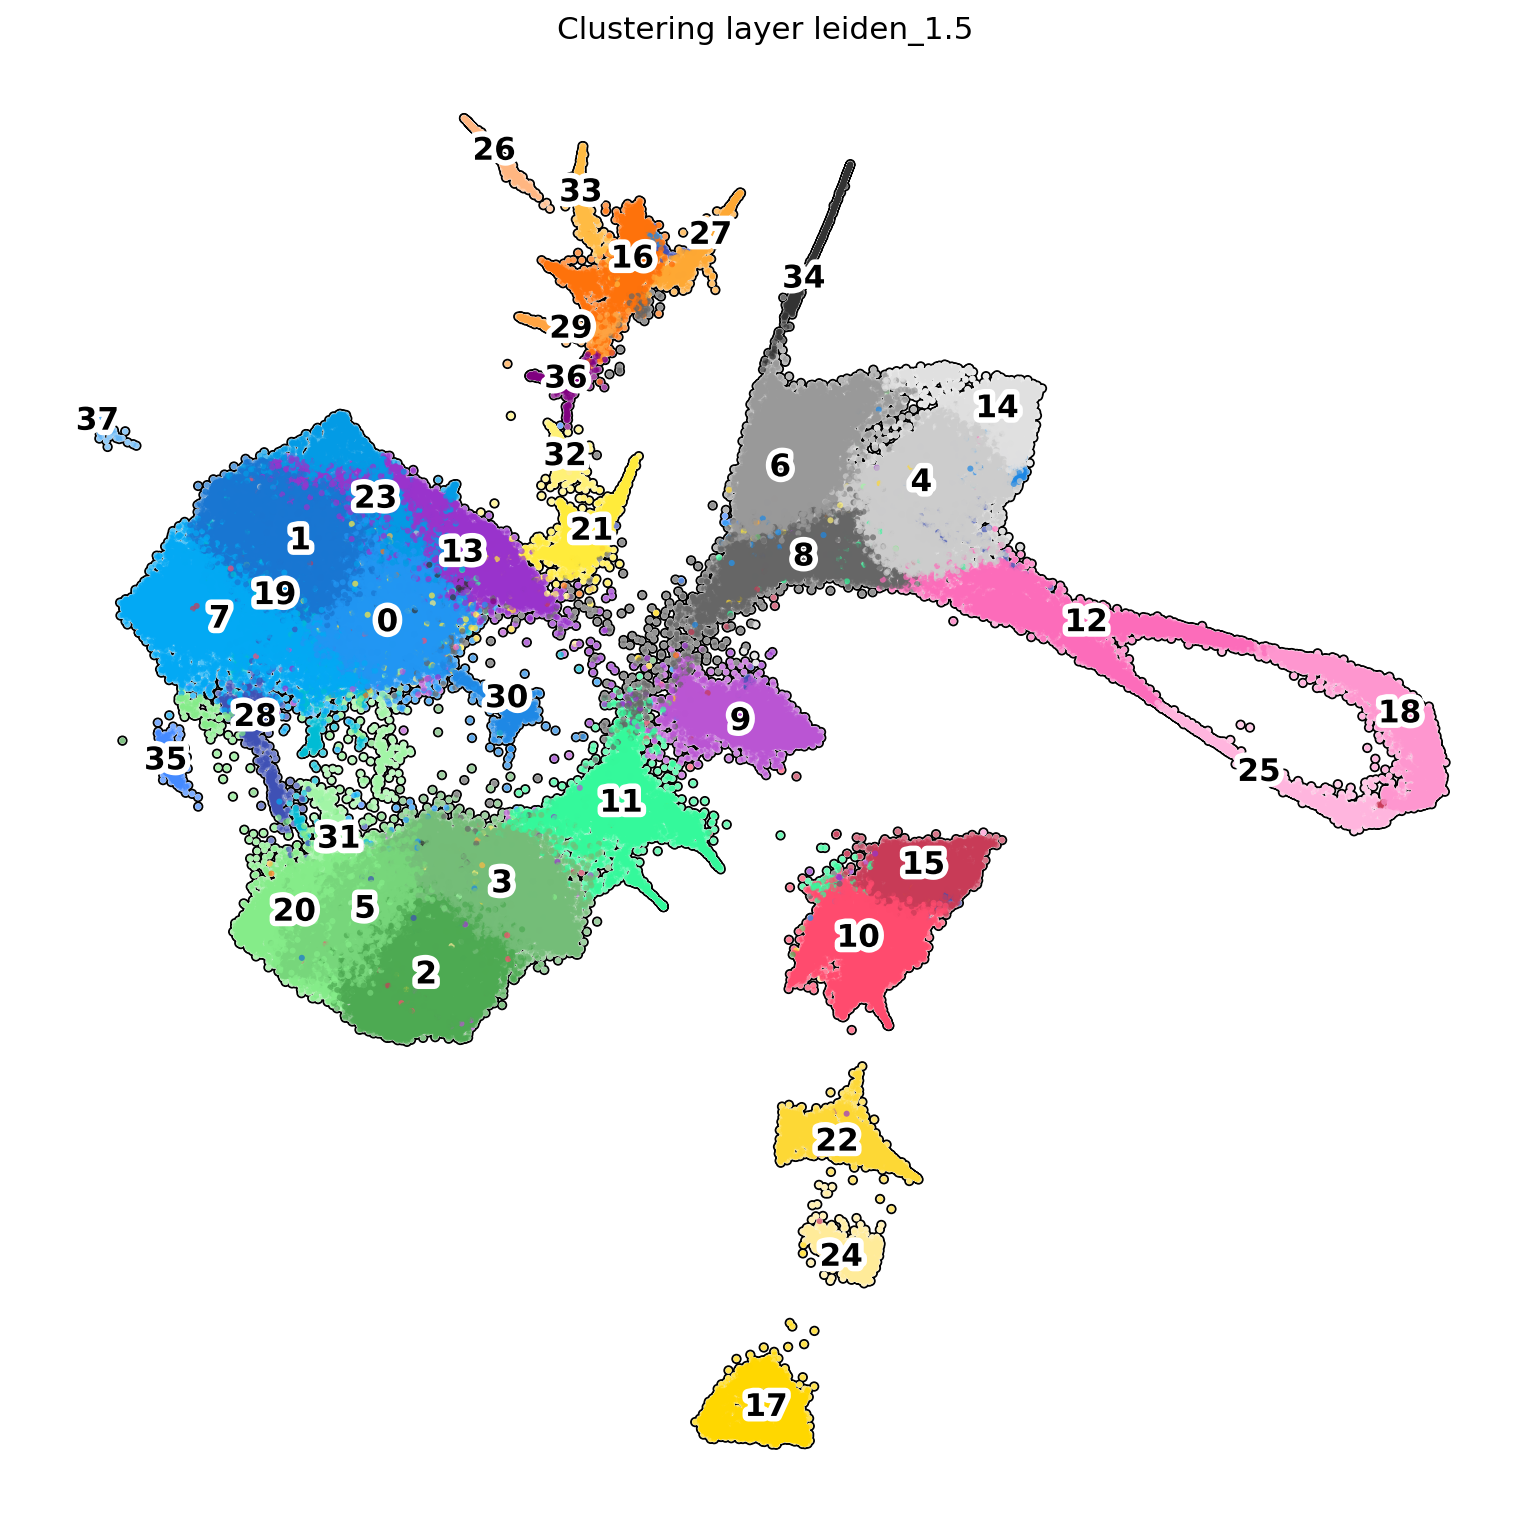

In [ ]:
with plt.rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5, title= 'Clustering layer '+str(clusteringlayer), size = 30,
        frameon=False, add_outline = True)

In [ ]:
adata

AnnData object with n_obs × n_vars = 195300 × 18061
    obs: 'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_1.5', 'leiden_2', 'Colony_part', 'Unique', 'leiden_1.5_names', 'broad_names', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'ratio_with_no', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Colony_part_colors', 'Library_colors', 'broad_names_colors', 'dendrogram_leiden_1.5', 'hvg', 'leiden', 'leiden_1.5_colors', 'leiden_1.5_colors_sorted', 'leiden_1.5_sorted', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_1.5', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_wilcox_leiden_1', 'rank_genes_groups_wilcox_le

In [ ]:
mdata = md.MuData({'with':(mdata.mod["with"]), 'no':adata})

/mnt/sda/david/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [ ]:
mdata

MuData object with n_obs × n_vars = 277529 × 41187
  2 modalities
    with:	277529 x 23126
      obs:	'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'Colony_part', 'Unique'
      var:	'ratio_with_no'
    no:	195300 x 18061
      obs:	'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_1.5', 'leiden_2', 'Colony_part', 'Unique', 'leiden_1.5_names', 'broad_names', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
      var:	'ratio_with_no', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Colony_part_colors', 'Library_colors', 'broad_names_colors', 'dendrogram_leiden_1.5', 'hvg', 'leiden', 'leiden_1.5_colors', 'leiden_1.5_colors_sorted', 'leiden_1.5_sorted', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_1.5', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_wilcox_leiden_1', 'rank_genes_groups_wilcox_leiden_1.5', 'rank_genes_groups_wilcox_leiden_2', 'umap', 'leiden_1.5_names_colors', 'iroot', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips', 'paga', 'leiden_1.5_sizes'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap', 'X_diffmap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [ ]:
mdata.write("/mnt/sda/david/hydractinia/hydractinia_atlas_paga_20230825.h5mu")

/mnt/sda/david/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
